# Workflow 3 - cluster the trajectory

**Input:** EnGen object featurized with reduced dimensionality (generated by Workflow2)


**Output:** Representative trajectory ensemble  
<hr>
Steps:

1. Import the featurized trajectory from Workflow2
2. Choose clustering technique: KMeans, Gaussian Mixture Models
3. Choose appropriate parameters for clustering (number of clusters)
4. Additionally filter trajectories
5. Extract the ensemble

In [1]:
#required imports

from engens.core.EnGens import EnGen
from engens.core.ClustEn import *
import pickle as pk

### Step 0 - Load data from Workflow2

In [2]:
engen = None
with open("wf2_resulting_EnGen.pickle", "rb") as file:
    engen = pk.load(file)

In [3]:
traj = engen.traj
ref = engen.ref
print("Using the trajectory {} and reference pdb file {}".format(traj, ref))

topology = engen.mdtrajref
print("The topology is:")
print(topology)

feat_dims = engen.dimred_data.shape[0]
print("The dimensionality of your featurization is {}".format(feat_dims))

feat = engen.featurizers[engen.chosen_feat_index]
print("You chose to featurize with")
print(feat.describe())

dimred_data = engen.dimred_data
print("After dimensionality reduction the dimension of your features is {}".format(dimred_data.shape[1]))


Using the trajectory md_0_100_center_PL-aligned-engen-selected.xtc and reference pdb file md_0_100_center_PL-aligned-engen-selected.pdb
The topology is:
<mdtraj.Topology with 1 chains, 38 residues, 638 atoms, 648 bonds>
The dimensionality of your featurization is 10001
You chose to featurize with
['COS(PHI 0 LYS 39)', 'SIN(PHI 0 LYS 39)', 'COS(PSI 0 LEU 34)', 'SIN(PSI 0 LEU 34)', 'COS(PHI 0 THR 40)', 'SIN(PHI 0 THR 40)', 'COS(PSI 0 LYS 39)', 'SIN(PSI 0 LYS 39)', 'COS(PHI 0 SER 41)', 'SIN(PHI 0 SER 41)', 'COS(PSI 0 THR 40)', 'SIN(PSI 0 THR 40)', 'COS(PHI 0 SER 42)', 'SIN(PHI 0 SER 42)', 'COS(PSI 0 SER 41)', 'SIN(PSI 0 SER 41)', 'COS(PHI 0 SER 43)', 'SIN(PHI 0 SER 43)', 'COS(PSI 0 SER 42)', 'SIN(PSI 0 SER 42)', 'COS(PHI 0 PHE 44)', 'SIN(PHI 0 PHE 44)', 'COS(PSI 0 SER 43)', 'SIN(PSI 0 SER 43)', 'COS(PHI 0 PHE 56)', 'SIN(PHI 0 PHE 56)', 'COS(PSI 0 PHE 44)', 'SIN(PSI 0 PHE 44)', 'COS(PHI 0 TYR 57)', 'SIN(PHI 0 TYR 57)', 'COS(PSI 0 PHE 56)', 'SIN(PSI 0 PHE 56)', 'COS(PHI 0 GLY 58)', 'SIN(PHI

### Step 1 - choose the clustering method

In [4]:
#------------two clustering algorithms------------------#
#----------------choose and uncomment one----------------#
# Option 1 - choose Kmeans
'''
clustering = "KM"
cluster_method = clusterings[clustering](engen, n_rep=2)

# Option 2 - choose GMMs
'''
clustering = "GMM" 
cluster_method = clusterings[clustering](engen, n_rep=2)


### Step 2 - run the clustering with different parameters

Clustering with params={'n_components': 2}
Clustering with params={'n_components': 3}
Clustering with params={'n_components': 4}
Clustering with params={'n_components': 5}
Clustering with params={'n_components': 6}
Clustering with params={'n_components': 7}
Clustering with params={'n_components': 8}
Clustering with params={'n_components': 9}


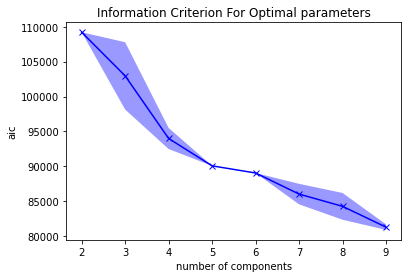

Optimal params={'n_components': 4}


In [5]:
# Create K clusters
if clustering =="KM":
    params = [{"n_clusters":i} for i in range(2, 10)]
    cluster_method.cluster_multiple_params(params)
else:
    params = [{"n_components":i} for i in range(2, 10)]
    cluster_method.cluster_multiple_params(params)

# analyze these parameters with the elbow method
cluster_method.analyze_elbow_method()

Best parameters from silhouette analysis are {'n_components': 2}


{'n_components': 2}

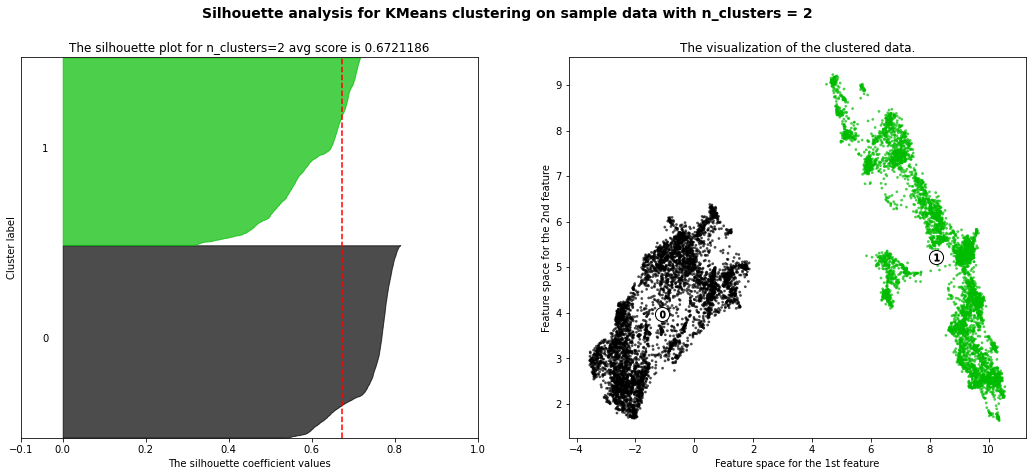

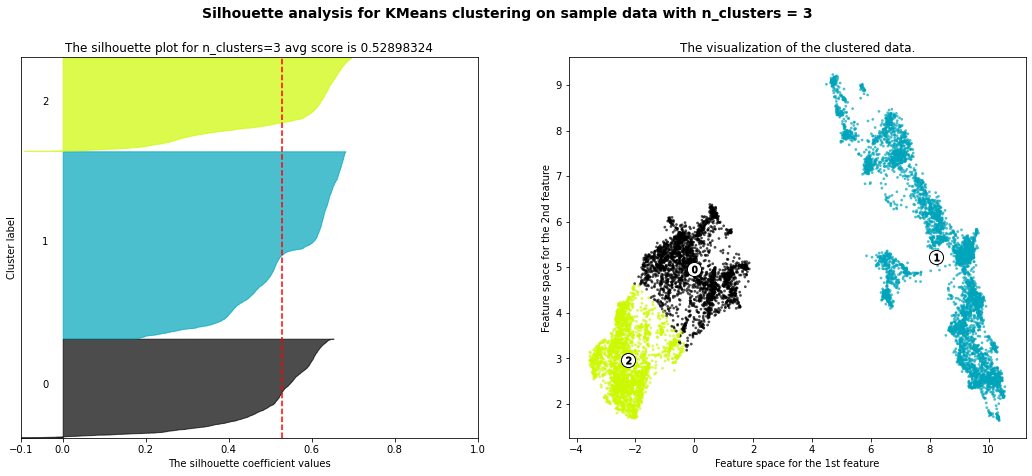

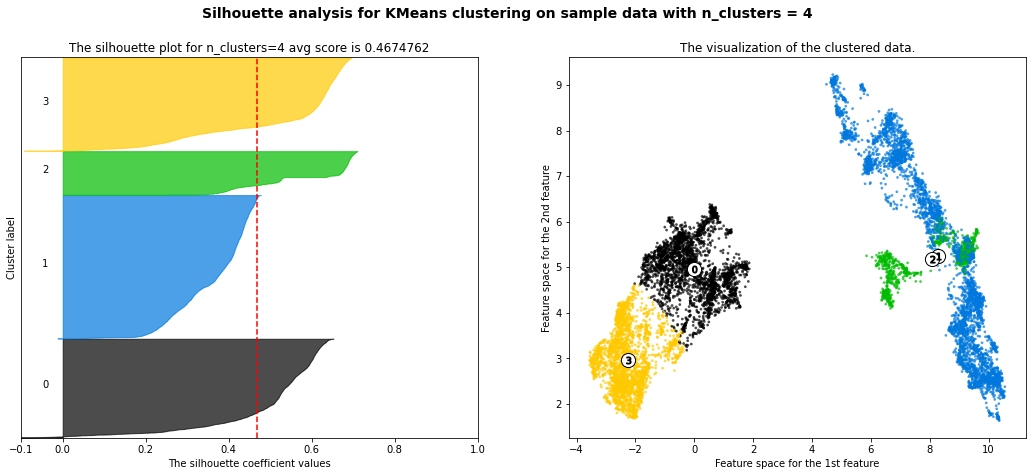

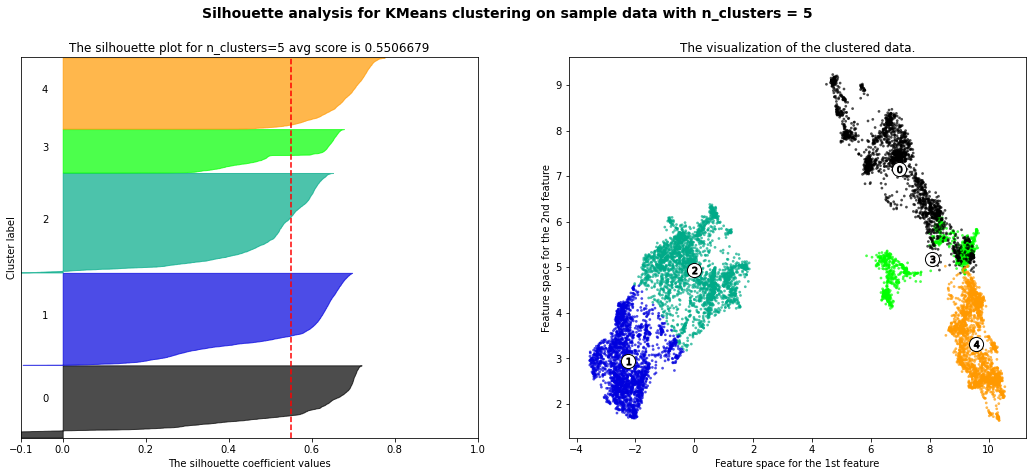

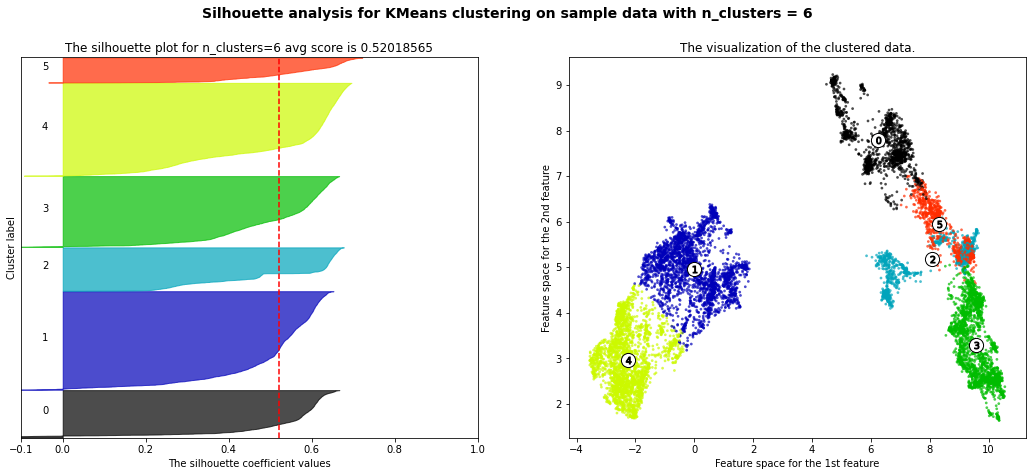

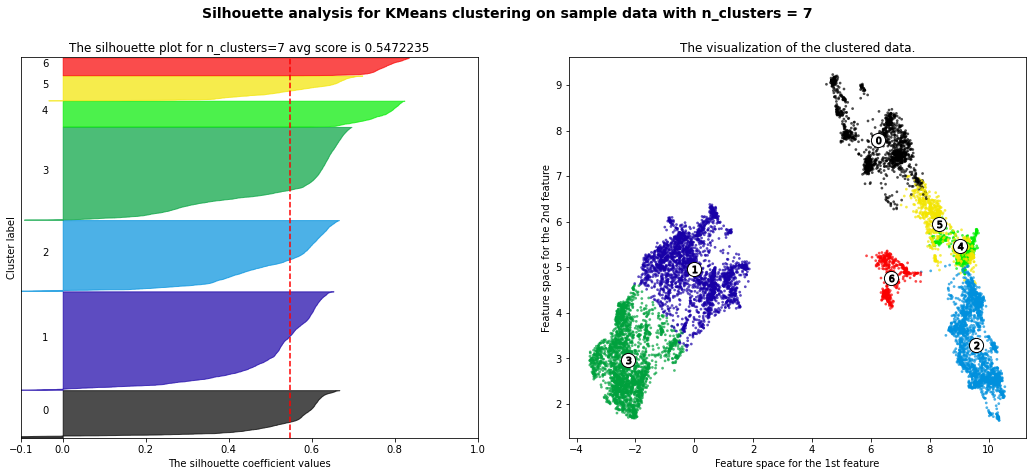

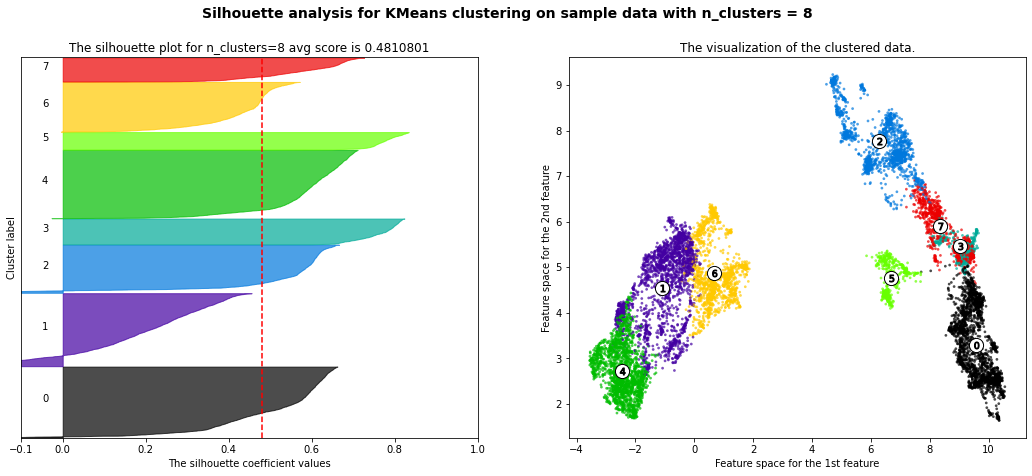

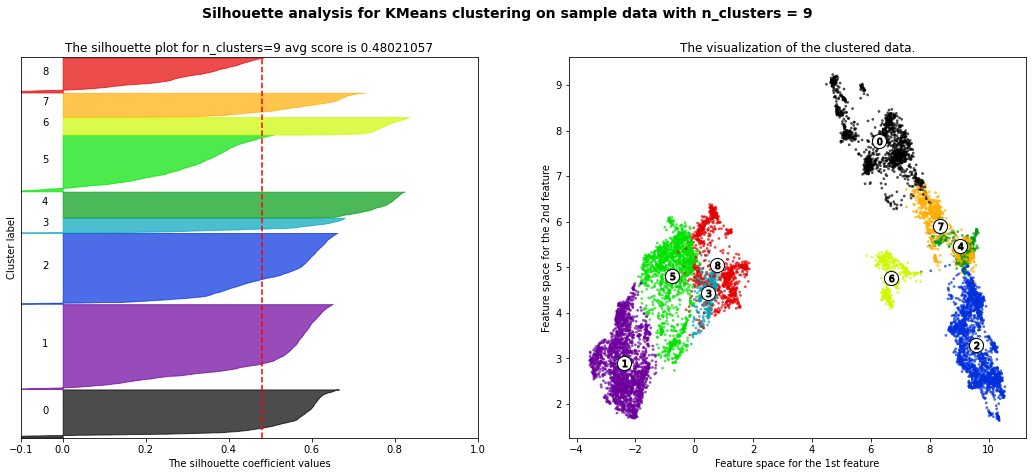

In [6]:
# analyze these parameters with the silhouette method
cluster_method.analyze_silhouette()

In [7]:
# pick the number of clusters
n = 2
cluster_method.choose_n(n)

### Step 3 - optionally pick a subset of clusters with the heighest weight

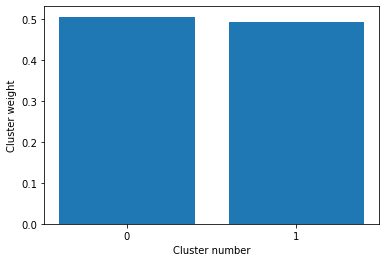

In [8]:
cluster_method.plot_cluster_weight()

Chosen cluster ids: [0, 1]


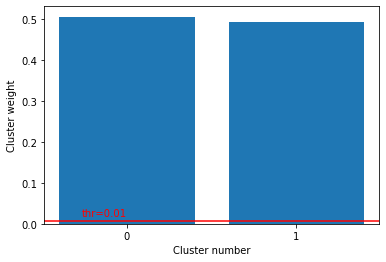

In [9]:
cluster_method.choose_clusters(thr=0.007)

### Step 4 - extract conformations for the ensemble

Choosing points closest to the cluster center
0
1


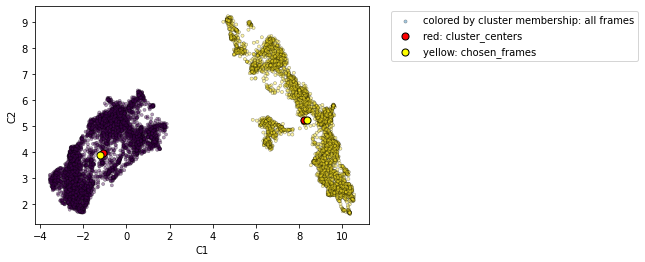

In [10]:
# mode can be 
# 1 - "center" and the representatives will be the points closest to the center of the clusters
# 2 - "hub" and the representatives will be the points with the most neighbors

mode = "center"
cluster_method.choose_conformations(mode=mode)

In [11]:
cluster_method.chosen_frames

array([6313, 3728])

In [12]:
ensemble_location = "./res_ensemble"
cluster_method.extract_conformations(ensemble_location)


Closest conformation inside cluster 0 frame 6313 of the striped trajectory
Extracting and saving to ./res_ensemble/conf_in_cluster_0.pdb
Closest conformation inside cluster 1 frame 3728 of the striped trajectory
Extracting and saving to ./res_ensemble/conf_in_cluster_1.pdb


### Step 5 - save results for analysis

In [13]:
with open("wf3_resulting_EnGen.pickle", "wb") as file:
    pk.dump(engen, file, -1)
    
with open("wf3_resulting_Clust.pickle", "wb") as file:
    pk.dump(cluster_method, file, -1)